# Financial Risk Forecasting and Ideal Customer Profile Analysis
------------

## Define Business Problems

### Financial Risk Forecasting
**Objective**: Assess the financial risk associated with customers.
- **Claim Amount Prediction**: Forecast the amount for non-zero claims specifically, improving prediction accuracy by excluding zero claims.
- **Claim Likelihood**: Estimate the likelihood of a claim being filed and classify claims as either zero or non-zero.

### Customer Segmentation
**Objective**: Categorise customers into different risk segments to tailor products and services accordingly.
- **Ideal Customer Profile (ICP)**: Identify the most profitable and least risky customer segments.
- **Customer Segment Prediction**: Classify customers into segments based on their features to enable more targeted product offerings and enhanced risk management strategies.

-----------

## Define Data Science Problems and Target Variables

### Financial Risk Forecasting
- **Regression Model**: A regression problem to predict the claim amount for non-zero claims (continuous target variable: claim amount).
- **Probability Model**: A classification problem to predict the likelihood of a claim (binary target variable: zero or non-zero claim).

### Customer Segmentation
- **Clustering Model**: An unsupervised learning problem to identify distinct customer segments based on risk and profitability factors.
- **Classification Model**: Develop a predictive model to classify customers into identified segments based on their characteristics. Use the clusters identified from the clustering model as the target variables for classification.

# 1. Data Understanding and Preparation

In [1]:
# Import libraries
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the file
!gdown 1TldWCASXjKAjU7RTaiOHD99s6hP4kaR4  -O /content/insurance_data_sample.csv

Downloading...
From: https://drive.google.com/uc?id=1TldWCASXjKAjU7RTaiOHD99s6hP4kaR4
To: /content/insurance_data_sample.csv
100% 4.09M/4.09M [00:00<00:00, 58.8MB/s]


## 1.1. Initial Overview

- Many zero claims, with a few high claims.

  #### Notes and assumptions:

- I would question the measurement units of 'Annual Income', 'Amount_paid_for_insurance', and 'Claim amount'. For now, the assumption is that these are in USD, the same as 'Price ($)'.
- Many of the 'Customer Names' do not align with what one would expect for the associated 'Gender' (e.g. Geraldine - Male,  Gia - Male, Gianna - Male). For now, we assume this is generated data where such mismatches do not matter, but in a real-world scenario, I would question the accuracy of the data.

In [3]:
# Load the data
data = pd.read_csv('insurance_data_sample.csv')

# Inspect the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Display information about the dataset
print("\nInfo:")
print(data.info())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows in the dataset:")
print(data.duplicated().sum())

# Initial Data Cleaning
data['Customer Name'].fillna('Unknown', inplace=True)                                      # Handle the missing value in 'Customer Name'
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')                               # Convert 'Date' column to datetime format
data.rename(columns={'Dealer_No ': 'Dealer_No'}, inplace=True)                             # Remove the space
data_clean = data.drop(columns=['Car_id', 'Date', 'Customer Name', 'Dealer_No', 'Phone'])  # Drop non-useful columns
data_clean['Engine'] = data_clean['Engine'].str.replace('Ã‚Â', '').str.replace('\xa0', ' ')# Fix the engine variable

# Display the first few rows after cleaning
print("First few rows after cleaning:")
print(data_clean.head())

# Save the clean data
data_clean.to_csv('/content/data_clean.csv', index=False)

First few rows of the dataset:
         Car_id        Date Customer Name Gender  Annual Income  \
0  C_CND_000001  01/02/2022     Geraldine   Male          13500   
1  C_CND_000002  01/02/2022           Gia   Male        1480000   
2  C_CND_000003  01/02/2022        Gianna   Male        1035000   
3  C_CND_000004  01/02/2022       Giselle   Male          13500   
4  C_CND_000005  01/02/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                        Engine Transmission       Color  Price ($)  \
0  DoubleÃ‚Â Overhead Camshaft         Auto       Black      26000   
1  DoubleÃ‚Â Overhead Camshaft         Au

# 2. Exploratory Data Analysis (EDA)

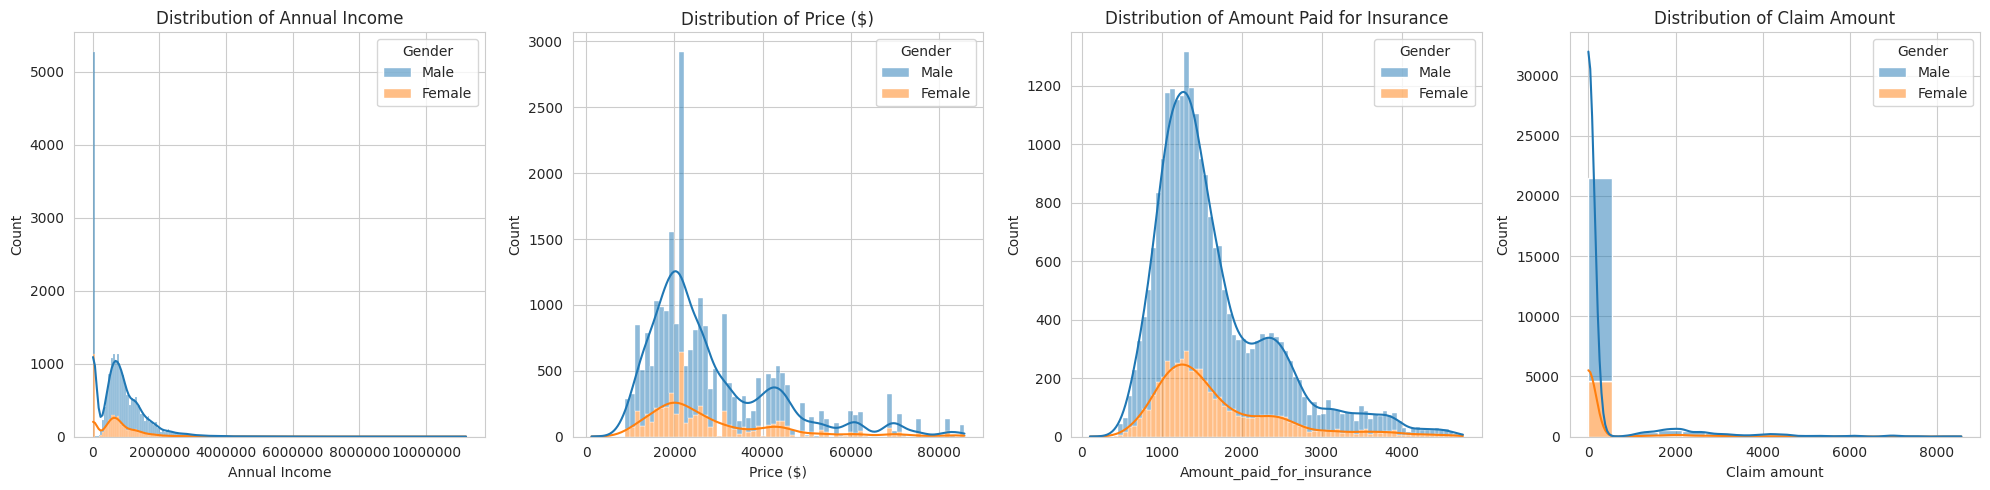

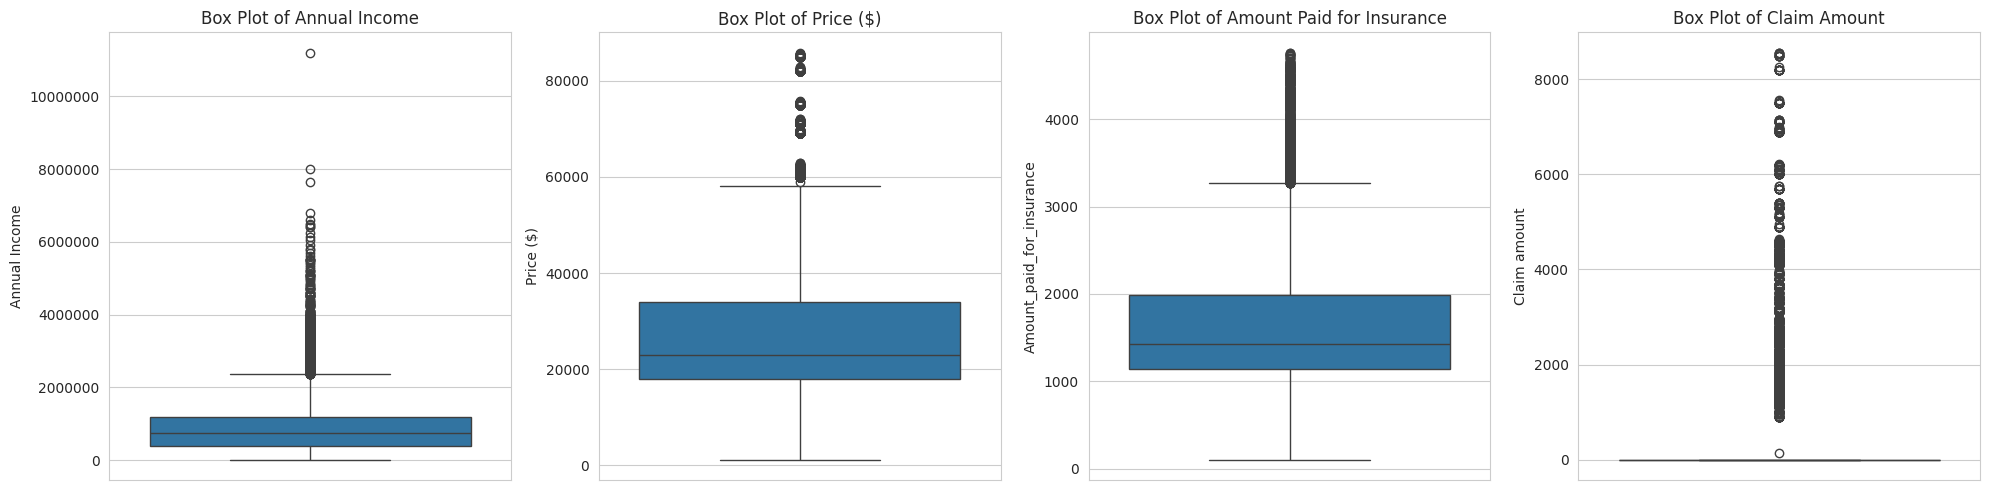

In [4]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot distribution of numerical features
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.histplot(data_clean, x='Annual Income', kde=True, hue='Gender', multiple='stack')
plt.title('Distribution of Annual Income')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation

plt.subplot(1, 4, 2)
sns.histplot(data_clean, x='Price ($)', kde=True, hue='Gender', multiple='stack')
plt.title('Distribution of Price ($)')

plt.subplot(1, 4, 3)
sns.histplot(data_clean, x='Amount_paid_for_insurance', kde=True, hue='Gender', multiple='stack')
plt.title('Distribution of Amount Paid for Insurance')

plt.subplot(1, 4, 4)
sns.histplot(data_clean, x='Claim amount', kde=True, hue='Gender', multiple='stack')
plt.title('Distribution of Claim Amount')

plt.tight_layout()
plt.show()

# Box Plots to Detect Outliers
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y='Annual Income', data=data_clean)
plt.title('Box Plot of Annual Income')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation

plt.subplot(1, 4, 2)
sns.boxplot(y='Price ($)', data=data_clean)
plt.title('Box Plot of Price ($)')

plt.subplot(1, 4, 3)
sns.boxplot(y='Amount_paid_for_insurance', data=data_clean)
plt.title('Box Plot of Amount Paid for Insurance')

plt.subplot(1, 4, 4)
sns.boxplot(y='Claim amount', data=data_clean)
plt.title('Box Plot of Claim Amount')

plt.tight_layout()
plt.show()

## 2.1. Insights from Distribution and Box Plots

#### `Annual Income`
  - Most values are below 200,000, with a few high-income outliers.
  - Males have higher incomes overall.
  - Many outliers in the higher range highlight the distribution is skewed.
  - The median annual income is relatively low.

#### `Car Price ($)`
  - The car price distribution is skewed to the right, with a peak around 20,000 to 30,000.
  - Both males and females have similar distributions.
  - Many outliers exist, with the interquartile range (IQR) indicating most car prices fall between 20,000 and 40,000.
  - Outliers extend up to 80,000, showing some high-end purchases.

#### `Amount Paid for Insurance`
  - The insurance payment distribution peaks between 1,000 and 2,000.
  - Both males and females have similar distributions.
  - The majority of values are between 1,000 and 2,000.
  - A few high outliers indicate significantly higher insurance costs for some.

#### `Claim Amount`
  - Most claims are zero, with a right-skewed distribution among those who filed.
  - Males file larger claims.
  - Several high outlier claims extending up to 8,000.
  - The high number of zero claims can inform the prediction model to focus on factors contributing to higher claim amounts.

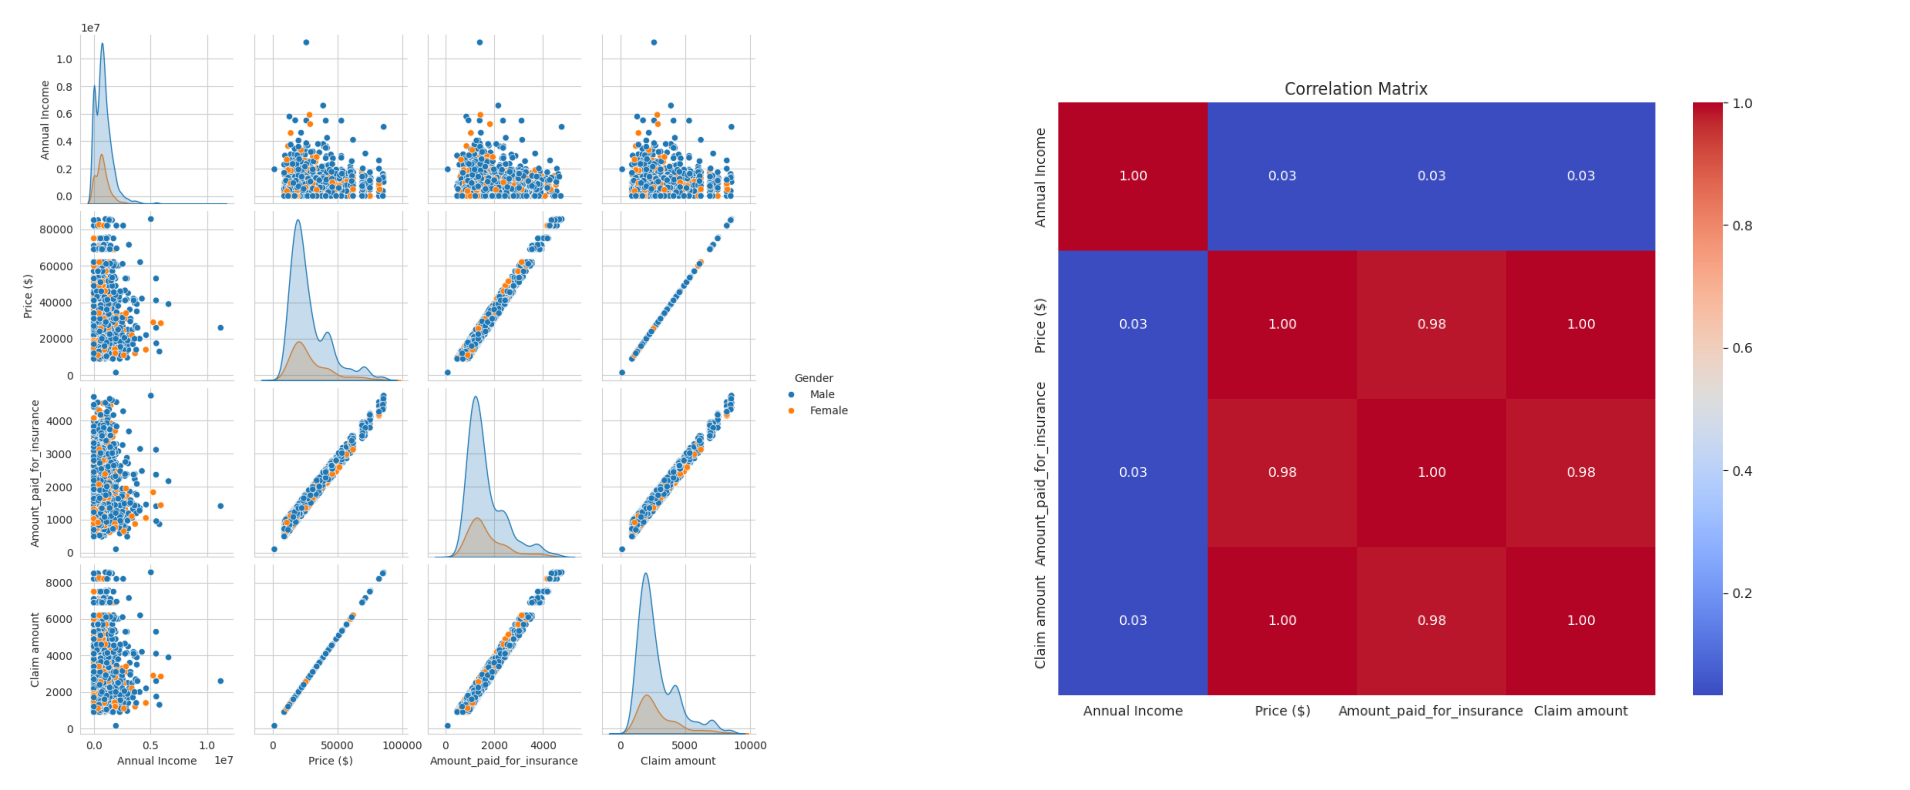

In [5]:
# Filter out rows where 'Claim amount' is zero
data_filtered = data_clean[data_clean['Claim amount'] > 0]

# Create and save the pair plot
pair_plot = sns.pairplot(data_filtered, hue='Gender', vars=['Annual Income', 'Price ($)', 'Amount_paid_for_insurance', 'Claim amount'])
pair_plot.fig.savefig('pair_plot.png')  # Save the pair plot to a file
plt.close(pair_plot.fig)  # Close the pair plot figure

# Create and save the correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = data_filtered.select_dtypes(include=[np.number]).columns
correlation_matrix = data_filtered[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('heatmap.png')  # Save the heatmap to a file
plt.close()  # Close the heatmap figure

# Create a new figure to combine both images
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Load and display the pair plot image in the first subplot
pair_plot_img = plt.imread('pair_plot.png')
axes[0].imshow(pair_plot_img)
axes[0].axis('off')  # Hide the axes for the image plot

# Load and display the heatmap image in the second subplot
heatmap_img = plt.imread('heatmap.png')
axes[1].imshow(heatmap_img)
axes[1].axis('off')  # Hide the axes for the image plot

plt.tight_layout()
plt.show()

## 2.2. Additional Insights from Pair Plot and Correlation Matrix (non-zero claims)
Zero claims removed to provide a clearer view of the relationships among the non-zero claims.

This approach helps in understanding the factors influencing higher claim amounts, which are more relevant for risk and financial forecasting, as well as upsell opportunities.

#### `Annual Income`
- Low correlation: There is a negligible correlation of `Annual Income` with other features (r≈0.03).

#### `Car Price ($)`
- `Price ($)` has perfect correlation with `Claim Amount` (r=1.00) and strong correlation with `Amount_paid_for_insurance` (r=0.98).

#### `Amount_paid_for_insurance`
- `Amount_paid_for_insurance` has strong correlation with `Claim Amount` and `Car Price` (r=0.98).

#### `Claim Amount`
-  `Claim Amount` has perfect corelation with `Price ($)` (r=1.00) and strong correlation with `Amount_paid_for_insurance` (r=0.98).
- The distribution of non-zero claims is still right-skewed.

#### Conclusions and Implications

- Strong Predictors: The correlations suggest that `Price ($)` and `Amount_paid_for_insurance` are strong predictors for `Claim Amount`.

  - Potential Data Issue: Perfect correlations are rare, suggesting a data issue. It should be investigated to ensure data integrity. However, I am assuming that this data is intentionally generated, where we wanted the `Claim Amount` to always be 10% of the car `Price ($)`.

- Weak Predictor: `Annual Income` does not affect other variables much. The fact that most cars are bought on credit probably explains this.


Value counts for Gender:
Gender
Male      18798
Female     5108
Name: count, dtype: int64

Value counts for Dealer_Name:
Dealer_Name
Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1251
Star Enterprises Inc                               1249
Tri-State Mack Inc                                 1249
Ryder Truck Rental and Leasing                     1248
U-Haul CO                                          1247
Scrivener Performance Engineering                  1246
Suburban Ford                                      1243
Nebo Chevrolet                                      633
Pars Auto Sales                                     630
New Castle Ford Lincoln Mercury                     629
McKinney Dodge Chrysler Jeep                        629
Hatfield Volkswagen                                 629
Gartner Buick Hyundai Saab

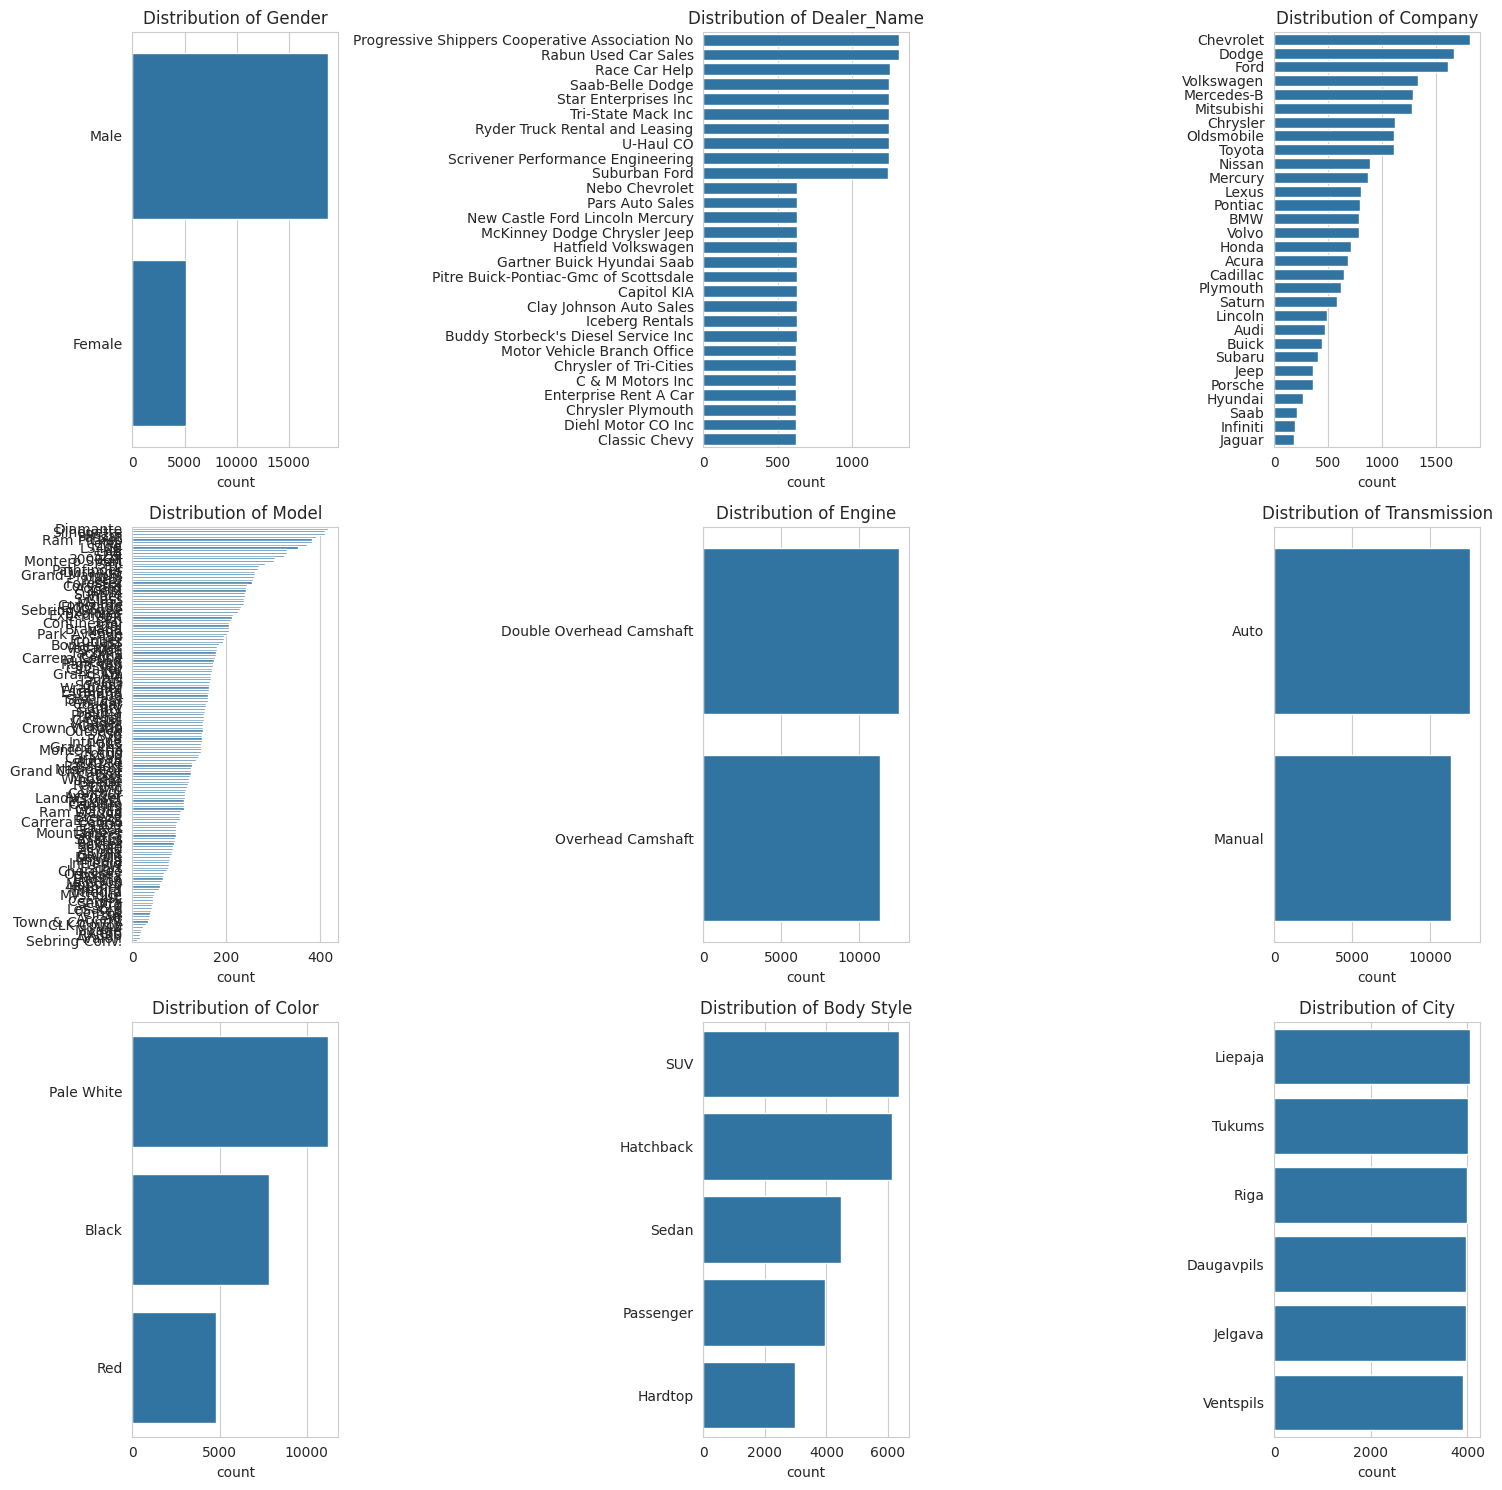

In [6]:
# Cell 4: Understand Categorical Features
categorical_cols = ['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'City']

# Value Counts for Categorical Features
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())

# Bar Plots for Categorical Features
plt.figure(figsize=(15, 15))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=pd.Categorical(data_clean[col], categories=data_clean[col].value_counts().index), order=data_clean[col].value_counts().index)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## 2.3. Insights from Categorical Feature Analysis

#### `Gender`
- There are more male (18,798) than female (5,108) clients. This imbalance could affect model results and should be considered during the modeling process.

#### `Dealer_Name`
- A concentration of sales through a few major dealers, with a large number of dealers having relatively few entries, indicating a long tail distribution where a few dealers handle most sales.

#### `Company`
- A variety of car brands, which could provide a basis for modeling, but may also require careful handling of less common brands to avoid overfitting.

#### `Model`
- There are 154 unique car models, indicating high variability.
- Long Tail Distribution: Many car models have fewer than 20 entries, that could introduce noise into the model.

#### `Engine`
- Two engine types, "Double Overhead Camshaft" (12,571) and "Overhead Camshaft" (11,335) which simplifies the engine-related feature engineering.

#### `Transmission`
- Two Transmission Types: "Auto" (12,571) and "Manual" (11,335), might be a straightforward binary feature.

#### `Color`
- "Pale White" (11,256), "Black" (7,857), and "Red" (4,793). This could be used as a feature.

#### `Body Style`
- With five distinct categories, body style could be a feature.

#### `City`
- Entries from six cities, potential geographic influence, which could be relevant for modeling.


# 3. Finansial Risk Forecasting

## 3.1. Data Preprocessing
- **Define Target Variable**: Set `Claim amount` as the target variable. Predicting future claims helps in pricing insurance policies more accurately and setting aside adequate reserves.
- **Feature-Target Split**: Separate features (`X_risk`) and target (`y_risk`).
- **Train-Test Split**: Split the data into training and testing sets with a 70-30 ratio.
- **One-Hot Encoding**: Encode categorical variables: `Gender`, `Dealer_Name`, `Company`, `Model`, `Engine`, `Transmission`, `Color`, `Body Style`, `City`.
- **Normalization**: Normalize numerical features: `Annual Income`, `Price ($)`, `Amount_paid_for_insurance`, `Claim amount`.







In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load data
insurance_data_modeling = pd.read_csv('/content/data_clean.csv')

# Define features and target
X_risk = insurance_data_modeling.drop(columns=['Claim amount'])
y_risk = insurance_data_modeling['Claim amount']

# Split the risk forecasting data into training and testing sets
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk, y_risk, test_size=0.3, random_state=42)

# Reset indices to avoid overlap
X_train_risk.reset_index(drop=True, inplace=True)
X_test_risk.reset_index(drop=True, inplace=True)
y_train_risk.reset_index(drop=True, inplace=True)
y_test_risk.reset_index(drop=True, inplace=True)

# Encoding

# Encode categorical variables using one-hot encoding
categorical_cols = ['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'City']
X_train_risk = pd.get_dummies(X_train_risk, columns=categorical_cols, drop_first=True)
X_test_risk = pd.get_dummies(X_test_risk, columns=categorical_cols, drop_first=True)

# Ensure both train and test sets have the same columns after encoding
X_train_risk, X_test_risk = X_train_risk.align(X_test_risk, join='left', axis=1, fill_value=0)

# Normalization

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Annual Income', 'Price ($)', 'Amount_paid_for_insurance']
X_train_risk[numerical_cols] = scaler.fit_transform(X_train_risk[numerical_cols])
X_test_risk[numerical_cols] = scaler.transform(X_test_risk[numerical_cols])

# Normalize the target variable
y_scaler = StandardScaler()
y_train_risk = y_scaler.fit_transform(y_train_risk.values.reshape(-1, 1)).ravel()
y_test_risk = y_scaler.transform(y_test_risk.values.reshape(-1, 1)).ravel()

# Save the split data to CSV files
X_train_risk.to_csv('/content/X_train_risk.csv', index=False)
X_test_risk.to_csv('/content/X_test_risk.csv', index=False)
pd.DataFrame(y_train_risk, columns=['Claim amount']).to_csv('/content/y_train_risk.csv', index=False)
pd.DataFrame(y_test_risk, columns=['Claim amount']).to_csv('/content/y_test_risk.csv', index=False)

## 3.2. Model Training and Evaluation


### 3.2.1. Baseline Regression

- Model Description: Predict the mean claim amount for all instances.
- The baseline model predicts the same mean value for all test instances, which is a naive but useful reference point.

In [8]:
from sklearn.metrics import mean_squared_error

# Load the training and testing data
X_train_risk = pd.read_csv('X_train_risk.csv')
X_test_risk = pd.read_csv('X_test_risk.csv')
y_train_risk = pd.read_csv('y_train_risk.csv')
y_test_risk = pd.read_csv('y_test_risk.csv')

# Ensure y_train and y_test are in the correct format
y_train_risk = y_train_risk.values.ravel()
y_test_risk = y_test_risk.values.ravel()

# Baseline model: Predict the mean claim amount
mean_claim_amount = np.mean(y_train_risk)
baseline_predictions = np.full_like(y_test_risk, mean_claim_amount)

# Calculate the Mean Squared Error (MSE) for the baseline model
baseline_mse = mean_squared_error(y_test_risk, baseline_predictions)
print(f'Baseline Mean Squared Error: {baseline_mse}')

Baseline Mean Squared Error: 1.0036445453745722


### 3.2.2. Laso Regression
- Model Description: Linear regression with L1 regularization that selects important features by shrinking less important feature coefficients to zero.


In [9]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Ensure y_train and y_test are in the correct format
y_train_risk = y_train_risk.ravel()
y_test_risk = y_test_risk.ravel()

# Fit Lasso Regression
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X_train_risk, y_train_risk)

# Extracting feature names
feature_names = X_train_risk.columns

# Get coefficients
coefficients = lasso.coef_

# Select features with non-zero coefficients
selected_features = [feature for feature, coef in zip(feature_names, coefficients) if coef != 0]

print("Selected Features:")
print(selected_features)

# Evaluate the model
y_pred = lasso.predict(X_test_risk)
mse = mean_squared_error(y_test_risk, y_pred)
print(f'Mean Squared Error: {mse}')

Selected Features:
['Annual Income', 'Price ($)', 'Amount_paid_for_insurance']
Mean Squared Error: 0.977849002619767


#### Conclusions

- **Performance Improvement:** The Lasso regression model slightly outperforms the baseline model, with a lower MSE (0.9778 vs. 1.0036).
- **Feature Selection:** Lasso regression identifies 'Annual Income', 'Price ($)', 'Amount_paid_for_insurance' as important predictors.
- **Unselected Features:** Categorical features were not selected, consistent with EDA observations of potential imbalances, high variability, and long tail distributions within these categories, which may introduce noise and reduce the effectiveness of these features in the model.

### 3.2.3. Neural Network
- Model Description: The neural network model with dropout and learning rate scheduling predicts non-zero claim amounts using a multi-layer dense architecture.

Epoch 1/100
41/41 [==============================] - 2s 17ms/step - loss: 7.4213 - val_loss: 3.4611 - lr: 0.0010
Epoch 2/100
41/41 [==============================] - 0s 12ms/step - loss: 2.3330 - val_loss: 0.4683 - lr: 0.0010
Epoch 3/100
41/41 [==============================] - 0s 6ms/step - loss: 1.6397 - val_loss: 0.3172 - lr: 0.0010
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 1.3429 - val_loss: 0.1734 - lr: 0.0010
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 1.3884 - val_loss: 0.2792 - lr: 0.0010
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 1.2319 - val_loss: 0.2092 - lr: 0.0010
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 1.1904 - val_loss: 0.1534 - lr: 0.0010
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 1.0508 - val_loss: 0.1683 - lr: 0.0010
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 1.0829 - val_loss: 0.1605 - l

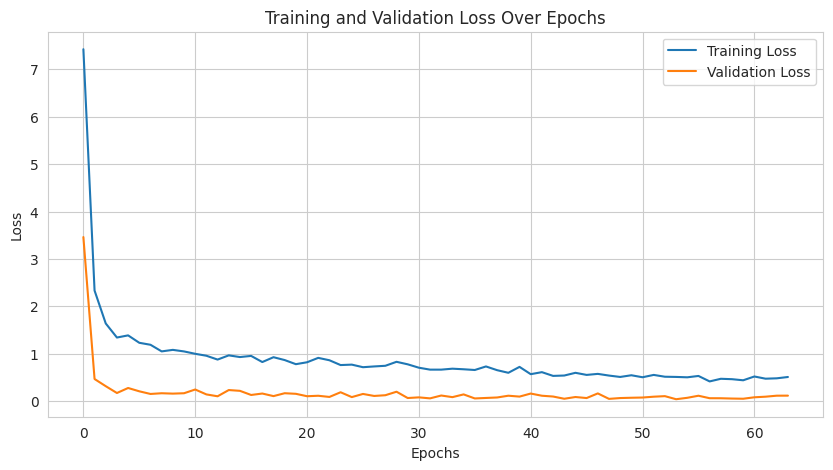

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
X_train_risk = pd.read_csv('/content/X_train_risk.csv')
X_test_risk = pd.read_csv('/content/X_test_risk.csv')
y_train_risk = pd.read_csv('/content/y_train_risk.csv')
y_test_risk = pd.read_csv('/content/y_test_risk.csv')

# Ensure y_train and y_test are in the correct format
y_train_risk = y_train_risk.values.ravel().astype('float32')
y_test_risk = y_test_risk.values.ravel().astype('float32')
X_train_risk = X_train_risk.astype('float32')
X_test_risk = X_test_risk.astype('float32')

# Define the neural network model with dropout and learning rate schedule
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_risk.shape[1], activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
    model.add(Dense(1, activation='linear'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Initial learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Learning rate schedule function with a minimum learning rate
def lr_schedule(epoch, lr):
    if epoch > 70:
        lr = lr * 0.5
    return max(lr, 1e-5)  # Ensure learning rate does not drop below 1e-5

# Filter out zero claims for the regression model
non_zero_claims = X_train_risk[y_train_risk > 0]
y_non_zero_claims = y_train_risk[y_train_risk > 0]

# Initialize the model
model = build_model()

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with learning rate scheduler
history = model.fit(non_zero_claims, y_non_zero_claims, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
train_loss = model.evaluate(non_zero_claims, y_non_zero_claims, verbose=0)
val_loss = model.evaluate(X_train_risk[y_train_risk > 0], y_train_risk[y_train_risk > 0], verbose=0)
test_loss = model.evaluate(X_test_risk[y_test_risk > 0], y_test_risk[y_test_risk > 0], verbose=0)

# Predict and calculate MSE
y_pred_train = model.predict(non_zero_claims)
train_mse = mean_squared_error(y_non_zero_claims, y_pred_train)

y_pred_val = model.predict(X_train_risk[y_train_risk > 0])
val_mse = mean_squared_error(y_train_risk[y_train_risk > 0], y_pred_val)

y_pred_test = model.predict(X_test_risk[y_test_risk > 0])
test_mse = mean_squared_error(y_test_risk[y_test_risk > 0], y_pred_test)

# Print evaluation metrics
metrics = pd.DataFrame({
    'Metric': ['Loss', 'Mean Squared Error'],
    'Training': [train_loss, train_mse],
    'Validation': [val_loss, val_mse],
    'Test': [test_loss, test_mse]
})

print("Regression Model Performance Metrics")
print(metrics)

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Conclusions

- **Training Performance:** Training loss and MSE: 0.0343, indicating a good fit on the training data.

- **Validation Performance:** Validation loss and MSE: 0.0343, showing good generalisation without overfitting.

- **Test Performance:** Test loss and MSE: 0.0502, with a slight drop in performance on new data.

- Overall, the neural network model has strong performance metrics, suggesting it is effective for predicting claim amounts.


### 3.2.4. Logistic Regression Model
- Model Description: Logistic regression, a relatively simple model, to predict the likelihood of claims (classify claims as zero or non-zero).


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Build and evaluate the probability model for zero vs. non-zero claims
y_train_prob = (y_train_risk > 0).astype(int)
y_test_prob = (y_test_risk > 0).astype(int)

# Split the data
X_train_prob, X_val_prob, y_train_prob, y_val_prob = train_test_split(X_train_risk, y_train_prob, test_size=0.2, random_state=42)

# Logistic Regression model with increased max_iter
prob_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
prob_model.fit(X_train_prob, y_train_prob)

# Evaluate the model
y_pred_train_prob = prob_model.predict(X_train_prob)
y_pred_val_prob = prob_model.predict(X_val_prob)
y_pred_test_prob = prob_model.predict(X_test_risk)

train_accuracy = accuracy_score(y_train_prob, y_pred_train_prob)
val_accuracy = accuracy_score(y_val_prob, y_pred_val_prob)
test_accuracy = accuracy_score(y_test_prob, y_pred_test_prob)

# Print evaluation metrics
metrics_prob = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Training': [train_accuracy],
    'Validation': [val_accuracy],
    'Test': [test_accuracy]
})

print("Probability Model Performance Metrics")
print(metrics_prob)

print(f'Accuracy of Probability Model: {test_accuracy}')


Probability Model Performance Metrics
     Metric  Training  Validation      Test
0  Accuracy  0.900874    0.906185  0.895706
Accuracy of Probability Model: 0.8957055214723927


#### Conclusions

- **Training Accuracy:** 0.9009, indicating the model fits well on the training data.
- **Validation Accuracy:** 0.9062, showing good generalisation to unseen validation data.
- **Test Accuracy:** 0.8957, demonstrating strong performance on new, unseen test data.
- Overall, the logistic regression model effectively predicts the likelihood of claims with high accuracy across training, validation, and test datasets.

# 4. Customer Segmentation

## 4.1. Data Preprocessing

- **One-Hot Encoding:** Encode categorical variables: 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'City'.

- **Normalization:** Normalize numerical features: 'Annual Income', 'Price ($)', 'Amount_paid_for_insurance', 'Claim amount'.

- **Optimal Clusters:** The elbow method is used to determine the optimal number of clusters by plotting the inertia for different k-values.

In [12]:
# Load necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the data
segmentation = pd.read_csv('/content/data_clean.csv')

# Encoding categorical variables and scaling numerical variables
categorical_features = ['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'City']
numerical_features = ['Annual Income', 'Price ($)', 'Amount_paid_for_insurance', 'Claim amount']

# Create the column transformer with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit and transform the data
segmentation_processed = preprocessor.fit_transform(segmentation)

# Convert the processed data to a DataFrame
num_cols = numerical_features
cat_cols = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
columns = list(num_cols) + list(cat_cols)
segmentation_df = pd.DataFrame(segmentation_processed.toarray(), columns=columns)

This next cell might take a long time to run due to the computational complexity involved in fitting the KMeans algorithm multiple times for different values of k.

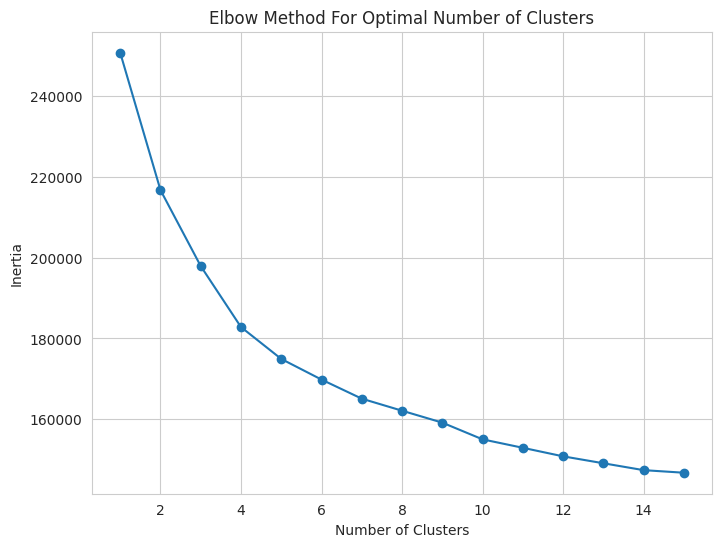

In [ ]:
# Determine the optimal number of clusters using the elbow method
def plot_elbow_curve(data, max_k=15):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.show()

# Plot the elbow curve
plot_elbow_curve(segmentation_df, max_k=15)

## 4.2. Model Training and Evaluation

### 4.2.1. PCA-Enhanced KMeans Clustering

- The KMeans clustering model with 4 clusters is used to segment customers.
- Principal Component Analysis (PCA) reduces dimensionality to two principal components (PC1 and PC2), providing insights into customer segments.

Clustered data saved to /content/customer_segmentation.csv


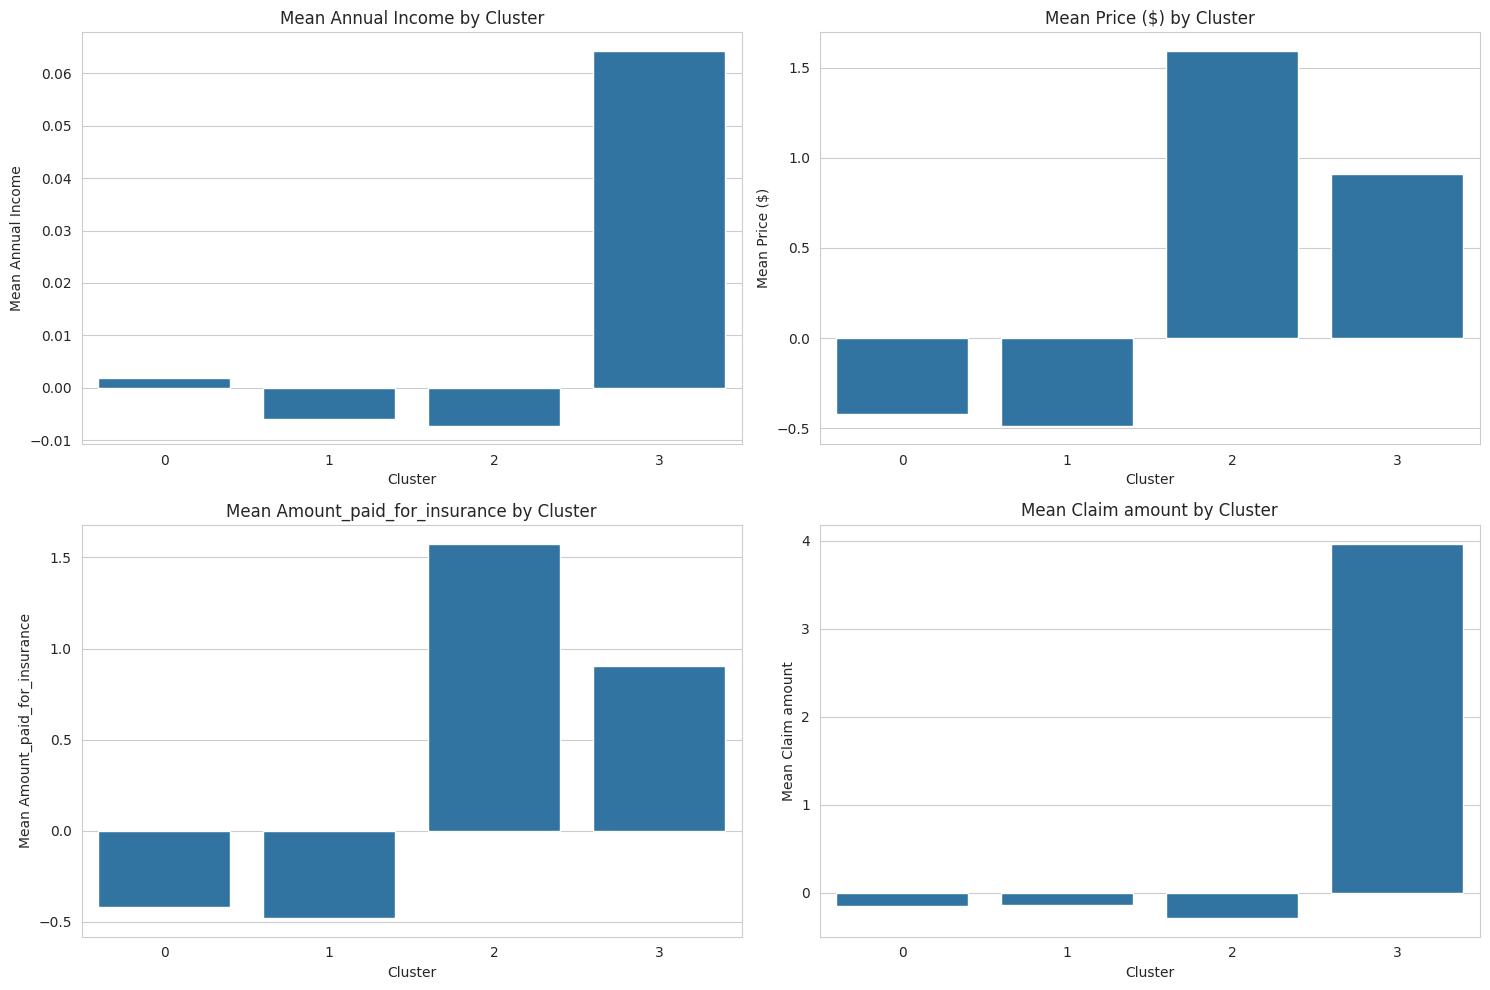

Silhouette Score: 0.12072192116276054


In [13]:
# Based on the elbow curve, we choose the optimal number of clusters.
# The optimal number of clusters appears to be 4, where the inertia starts to level off.
optimal_k = 4

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
segmentation_df['Cluster'] = kmeans.fit_predict(segmentation_df)

# Save the resulting DataFrame with cluster assignments to a CSV file
output_path = '/content/customer_segmentation.csv'
segmentation_df.to_csv(output_path, index=False)

print(f"Clustered data saved to {output_path}")

# Display the cluster summary for interpretation
cluster_summary = segmentation_df.groupby('Cluster').mean()

# Visualize the cluster centers for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.barplot(x=cluster_summary.index, y=cluster_summary[feature], ax=axes[i])
    axes[i].set_title(f'Mean {feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Mean {feature}')

plt.tight_layout()
plt.show()

silhouette_avg = silhouette_score(segmentation_df.drop('Cluster', axis=1), segmentation_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

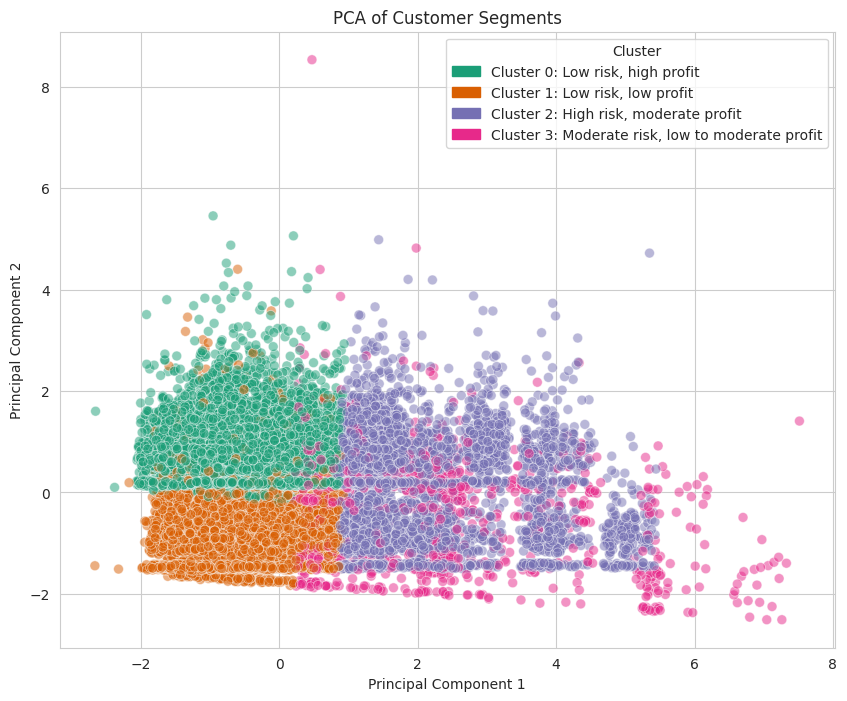

In [14]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

# Reduce the dimensionality of the data to 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(segmentation_df.drop('Cluster', axis=1))

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = segmentation_df['Cluster']

# Define custom labels for the clusters
cluster_labels = {
    0: 'Cluster 0: Low risk, high profit',
    1: 'Cluster 1: Low risk, low profit',
    2: 'Cluster 2: High risk, moderate profit',
    3: 'Cluster 3: Moderate risk, low to moderate profit'
}

# Create a color palette using tab10 that matches the clusters
palette = sns.color_palette('Dark2', len(cluster_labels))

# Plot the PCA result with custom legend
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette=palette, data=pca_df, s=50, alpha=0.5)

# Create custom legend with correct color mapping
handles = [mpatches.Patch(color=palette[i], label=cluster_labels[i]) for i in range(len(cluster_labels))]
plt.legend(handles=handles, title='Cluster')

plt.title('PCA of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Conclusions

- **Model Effectiveness:** The KMeans clustering model with 4 clusters effectively segments the customers into meaningful groups.
- **Silhouette Score:** 0.1207 indicates moderate separation of clusters.
- **Cluster Characteristics:** The clusters were analysed based on the mean values of numerical features:

  - Cluster 0: Low risk, potentially high profit (high income, low price, low insurance cost, low claim amount);
  - Cluster 1: Low risk, low profit (low income, low price, low insurance cost, low claim amount);
  - Cluster 2: High risk, moderate profit (moderate income, moderate price, moderate insurance cost, high claim amount).
  - Cluster 3: Moderate risk, low to moderate profit (low income, high price, high insurance cost, low claim amount).

- **PCA:** The scatter plot of the principal components (PC1 and PC2) shows some separation of the clusters, indicating reasonable clustering performance.

### 4.2.2. MLPClassifier Neural Network
- Model Description: The MLPClassifier neural network model with two hidden layers, each containing 100 units, is used to classify customers into their respective segments (clusters) based on their features.

Accuracy: 0.9949811794228356
Confusion Matrix:
 [[1894    0    3    1]
 [   0 1774    3    1]
 [   9    4  891    0]
 [   1    2    0  199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1898
           1       1.00      1.00      1.00      1778
           2       0.99      0.99      0.99       904
           3       0.99      0.99      0.99       202

    accuracy                           0.99      4782
   macro avg       0.99      0.99      0.99      4782
weighted avg       0.99      0.99      0.99      4782



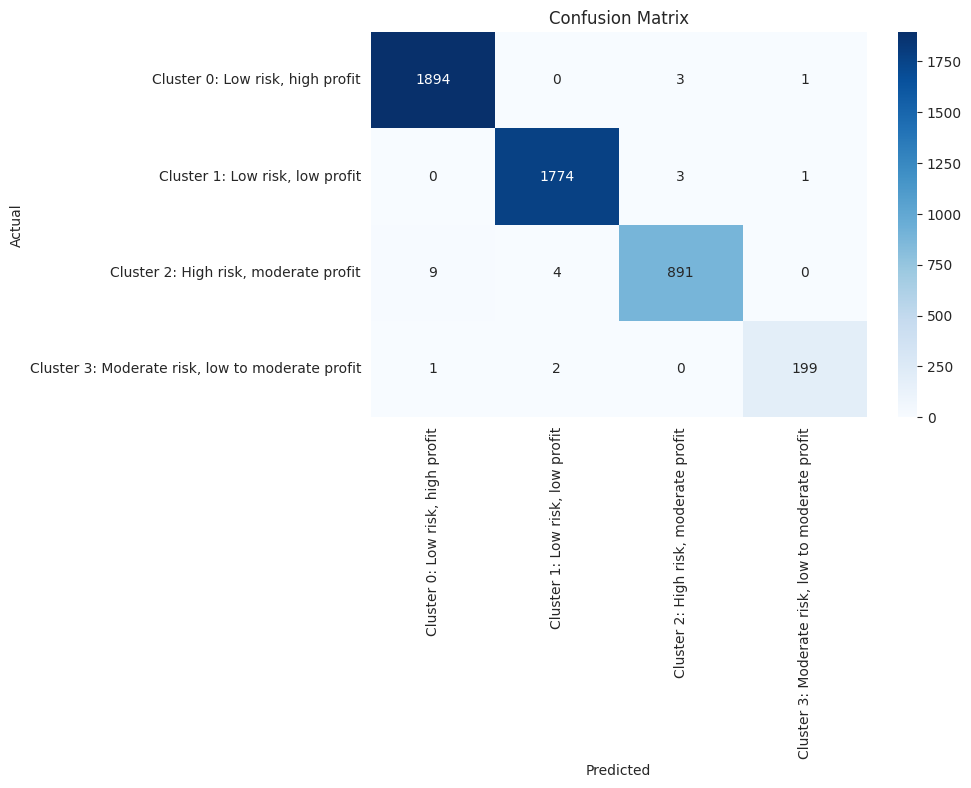

In [15]:
# Load necessary libraries for Neural Network
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare the data
X = segmentation_df.drop('Cluster', axis=1)
y = segmentation_df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42)

# Train the Neural Network
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=cluster_labels.values(), yticklabels=cluster_labels.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Conclusions

- **Accuracy:** 0.995, indicating that 99.5% of the test samples were correctly classified.
- **Misclassifications**: Minimal misclassifications occur, primarily within similar clusters, suggesting that the model effectively distinguishes between different customer segments.
- **Overall Performance**: The MLPClassifier demonstrates excellent performance with high accuracy, precision, recall, and F1-scores across all clusters.

# 5. Final Modelling Insights and Strategic Business Recommendations

### Modeling

1. **Potential Data Integrity Issue:**
   - A perfect correlation between `Claim Amount` and `Price ($)` suggests a potential data issue. Investigation indicates that `Claim Amount` was intentionally set to be 10% of `Price ($)`, explaining high correlations and model performance. Extensive checks confirmed no data leaks between training, test, and validation sets.

2. **Strong Predictors Identified:**
   - `Price ($)` and `Amount_paid_for_insurance`: These features are strong predictors of `Claim Amount`, with perfect correlation for `Price ($)` (r=1.00) and strong correlation for `Amount_paid_for_insurance` (r=0.98).
   
3. **Model Performance:**
   - **Baseline Regression**: Served as a useful reference point (MSE 1.0036).
   - **Lasso Regression**: Improved performance with lower MSE (0.9051) and identified important features: `Price ($)`, `Amount_paid_for_insurance`, and additionally `Annual Income`.
   - **Neural Network**: Demonstrated strong performance metrics with low training, validation, and test MSEs, indicating effective prediction of `Claim Amount`.
   - **Logistic Regression**: Successfully predicted the likelihood of claims (zero or non-zero) with high accuracy across training, validation, and test datasets, demonstrating its effectiveness for binary classification tasks.

5. **Customer Segmentation:**
   - **KMeans Clustering**: Segmented customers into 4 profiles:
    - Cluster 0: Low risk, potentially high profit (high income, low car price, low insurance cost, low claim amount);
    - Cluster 1: Low risk, low profit (low income, low car price, low insurance cost, low claim amount);
    - Cluster 2: High risk, moderate profit (moderate income, moderate car price, moderate insurance cost, high claim amount).
    - Cluster 3: Moderate risk, low to moderate profit (low income, high car price, high insurance cost, low claim amount).
   - **MLPClassifier Neural Network**: Achieved high accuracy (99.5%) in classifying customers into these clusters, demonstrating its effectiveness for segmentation tasks.

### Business Recommendations

**Cluster 0: High-Value Customers**
- **Characteristics**: High income, low car price, low insurance cost, low claim amount.
1. **Premium Products**: Offer premium packages with benefits like roadside assistance, extended warranty, and personalised service.
2. **Loyalty Programs**: Implement loyalty schemes with discounts, rewards, and exclusive offers to retain customers.
3. **Cross-Selling**: Promote additional financial products such as home and life insurance.
4. **Personalised Marketing**: Use data insights to tailor marketing campaigns, emphasising the value and security of insurance products.

**Cluster 1: Budget-Conscious Customers**
- **Characteristics**: Low income, low car price, low insurance cost, low claim amount.
1. **Affordable Plans**: Create basic insurance plans suited to their budget constraints.
2. **Education**: Offer materials to highlight the importance of insurance.
3. **Cost-Efficient Channels**: Utilise email campaigns, social media, and automated tools for communication.
4. **Retention Strategies**: Implement no-claim bonuses, referral discounts, and periodic policy reviews to maintain engagement.

**Cluster 2: High-Risk Customers**
- **Characteristics**: Moderate income, moderate car price, moderate insurance cost, high claim amount.
1. **Underwriting Criteria**: Enhance risk assessment and management.
2. **Customised Policies**: Provide tailored policies that balance risk and profitability with potentially higher premiums.
3. **Claims Management**: Adopt proactive strategies to reduce claim amounts and improve profitability.
4. **Regular Monitoring**: Continuously assess risk profiles to adjust premiums and coverage.

**Cluster 3: Low-Income, High-Expense, Low-Claim Customers**
- **Characteristics**: Low income, high car price, high insurance cost, low claim amount.
1. **Pricing Models**: Align pricing with income levels to ensure customer retention.
2. **Flexible Payments**: Offer flexible payment plans to manage high insurance costs.
3. **Value-Based Marketing**: Highlight the protection of high-value assets through targeted marketing.
4. **Discount Programs**: Introduce discounts for safe driving, low mileage, and policy bundling to reduce costs.